# Results from mice behaviour analysis

Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mice_behav_analysis as mba
import warnings
warnings.filterwarnings('ignore')

In [2]:
mba.set_paths(path_ops='Manuel')

In [3]:
df_trials, df_params, subj_unq = mba.load_data()

### Accuracy across sessions

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


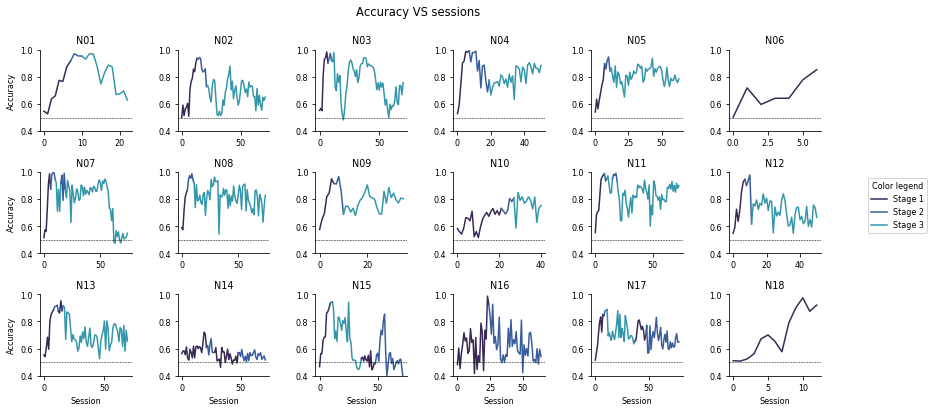

In [4]:
mba.plot_final_acc_session_subj(subj_unq=subj_unq, df_params=df_params, figsize=(14, 6))

### Mean accuracy at stage change for sessions

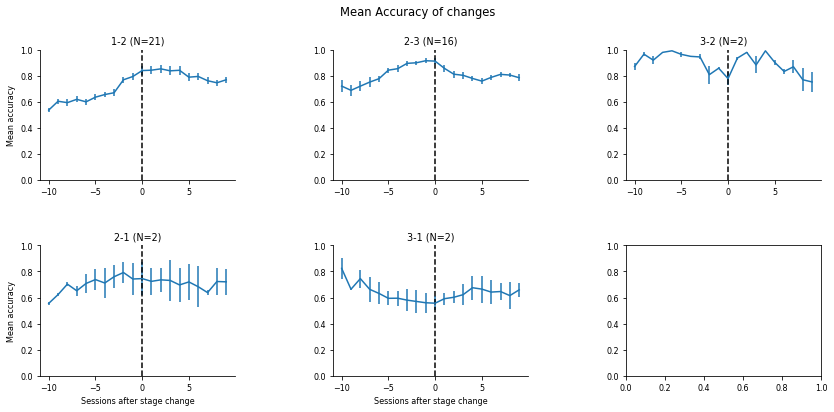

In [5]:
# TODO: do this for new stages t.i.a. motor and delays
prev_w = 10
nxt_w = 10
mat_mean_perfs, mat_std_perfs, num_samples = mba.accuracy_at_stg_change(df_params,
                                                                    subj_unq,
                                                                    prev_w=prev_w,
                                                                    nxt_w=nxt_w)
mba.plot_means_std(mat_mean_perfs, mat_std_perfs, num_samples, prev_w=prev_w,
                   nxt_w=nxt_w, figsize=(14, 6))

### Mean accuracy at stage change for trials

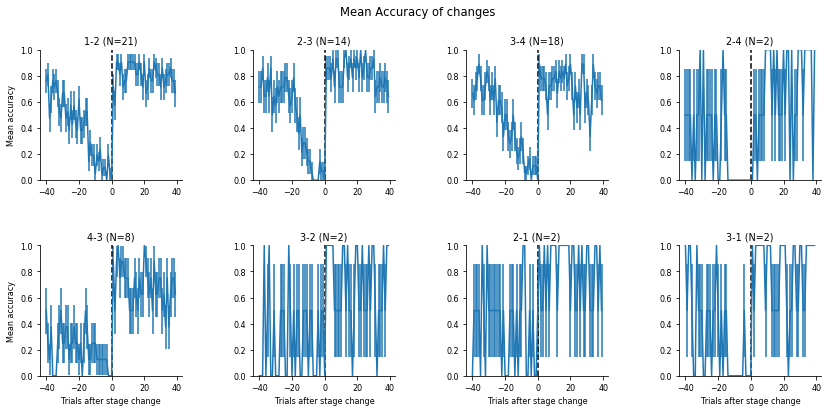

In [6]:
# TODO: take into account misses
dataframe_4stage = mba.dataframes_joint(df_trials, df_params, subj_unq)
prev_w = 40
nxt_w = 40
mat_mean_perfs, mat_std_perfs, num_samples =\
    mba.accuracy_at_stg_change_trials(dataframe_4stage, subj_unq,
                                  prev_w=prev_w, nxt_w=nxt_w)
mba.plot_means_std(mat_mean_perfs, mat_std_perfs, num_samples,
                       prev_w=prev_w, nxt_w=nxt_w, figsize=(14, 6))

### Accuracy across trials adding a fourth stage

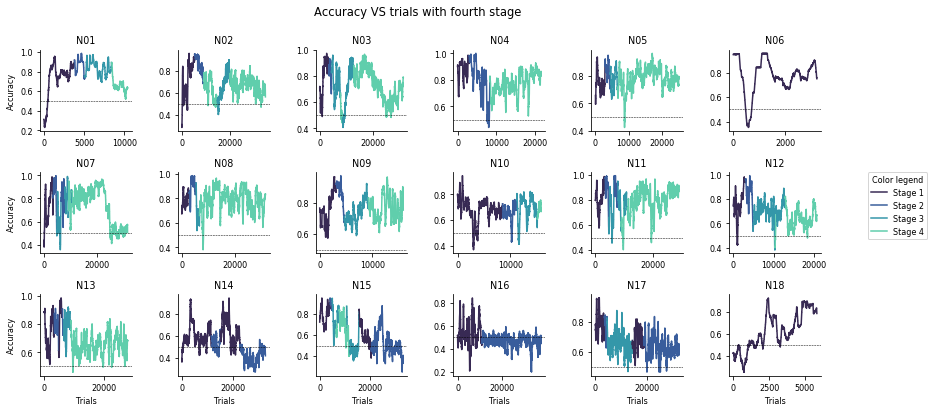

In [7]:
# The fourth is an aditional stage we created when the subject is at stage 3 and 
# motor 6 is activated
dataframe_4stage = mba.dataframes_joint(df_trials, df_params, subj_unq)
mba.plot_final_acc_session_subj_stage4(subj_unq, dataframe_4stage, figsize=(14, 6))

### Trials accuracy of all the subjects taking into account the misses

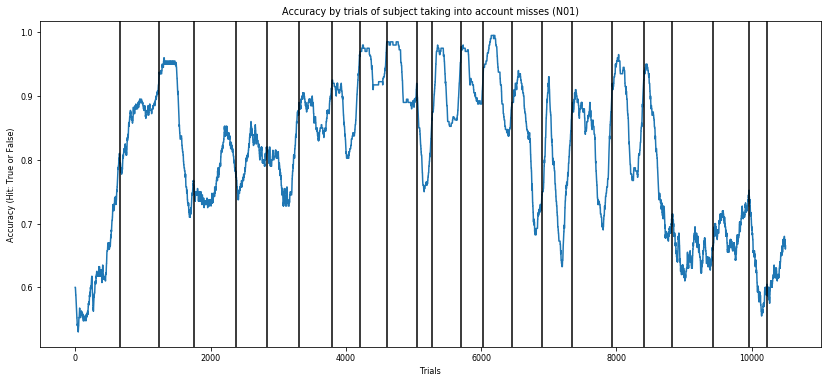

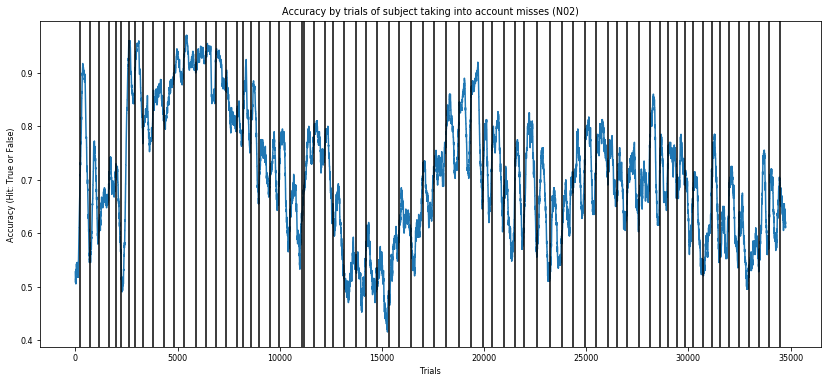

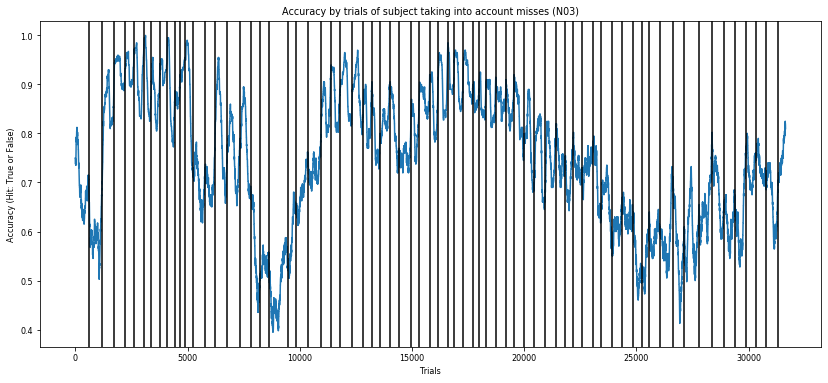

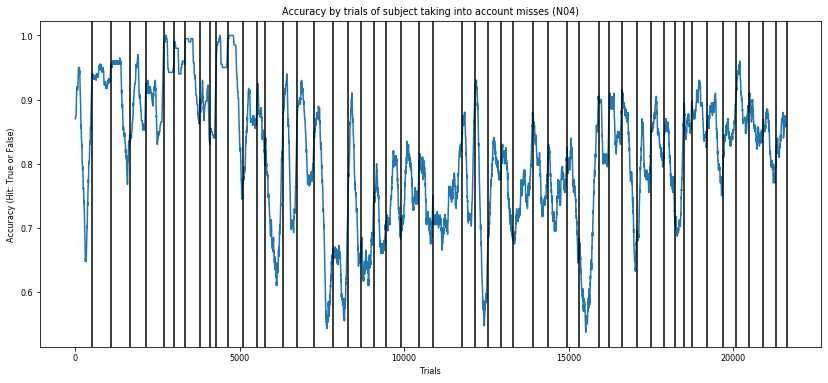

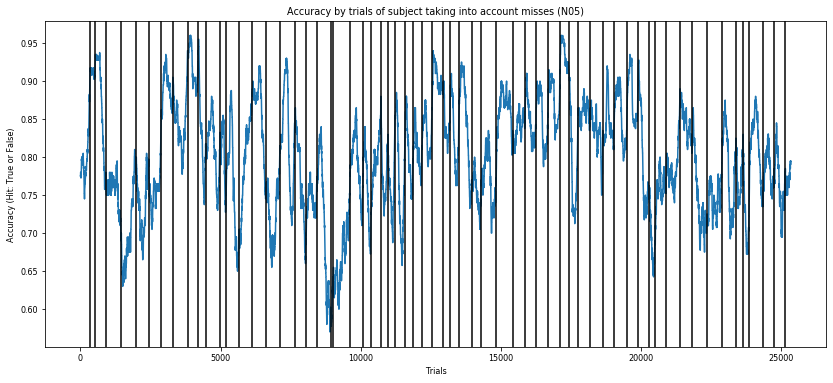

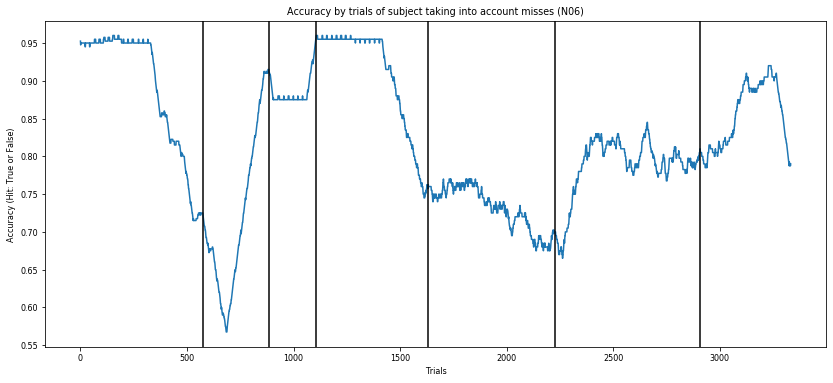

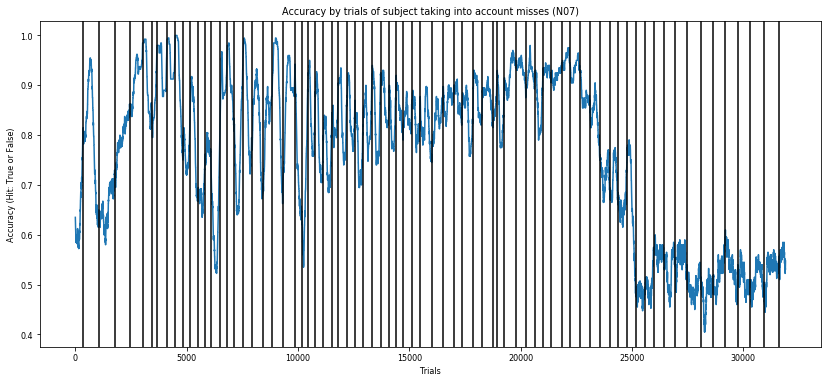

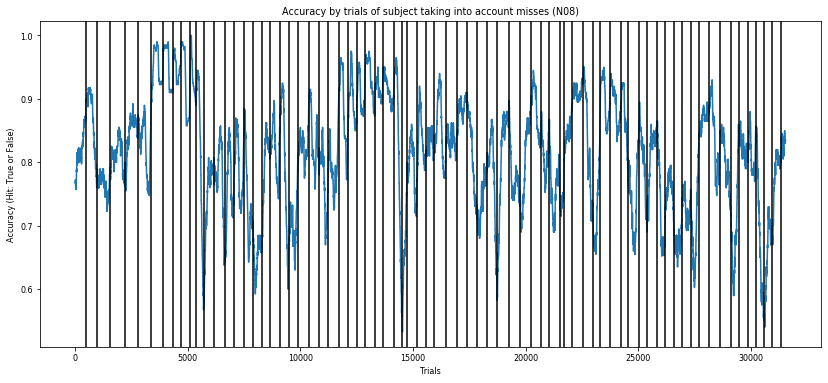

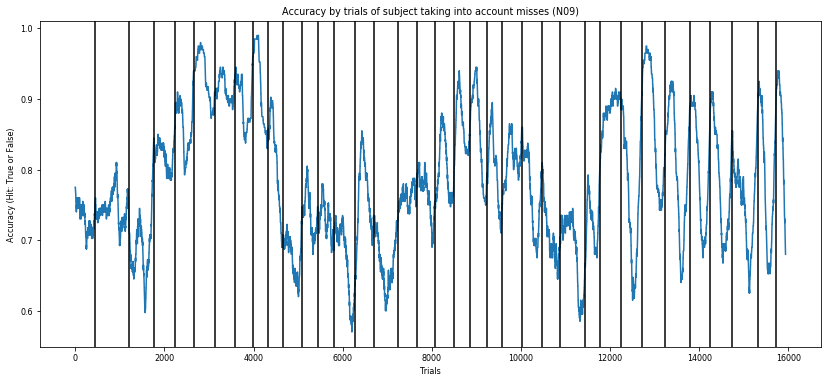

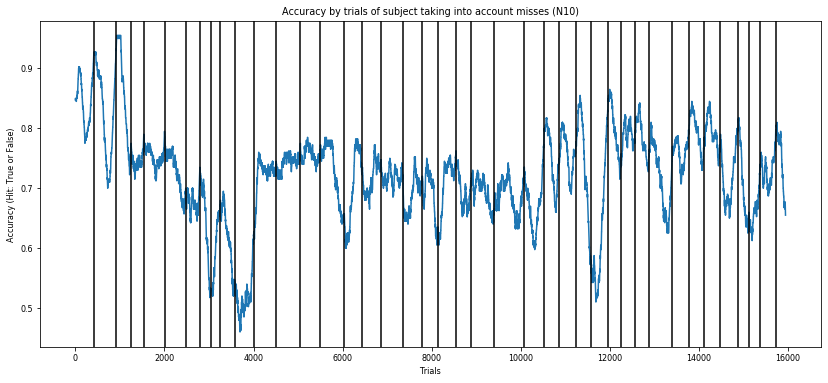

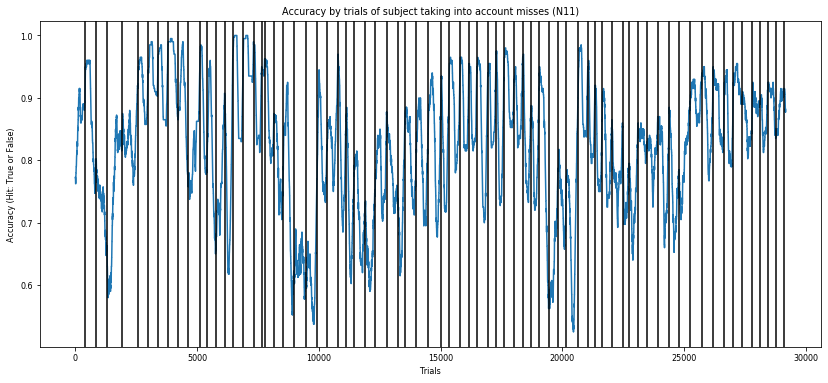

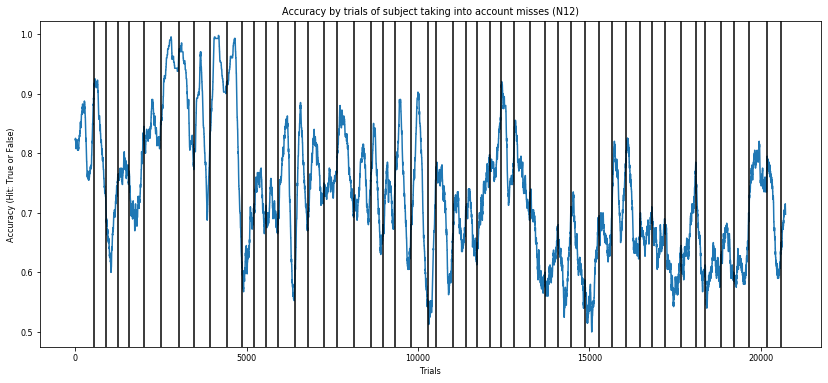

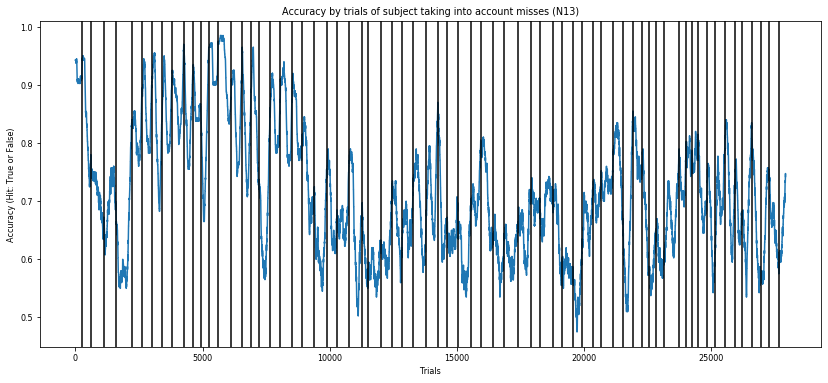

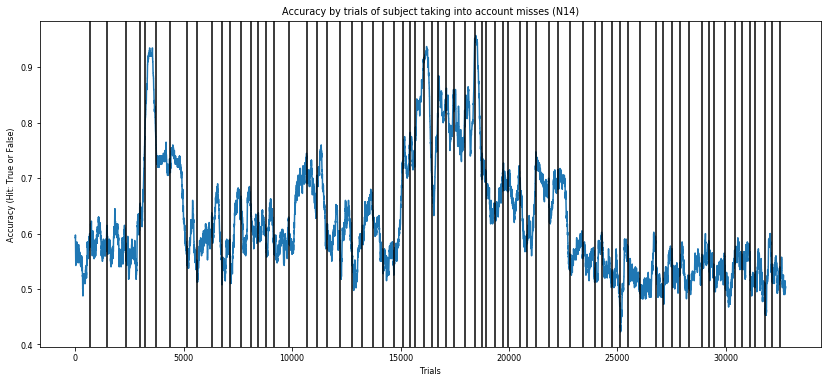

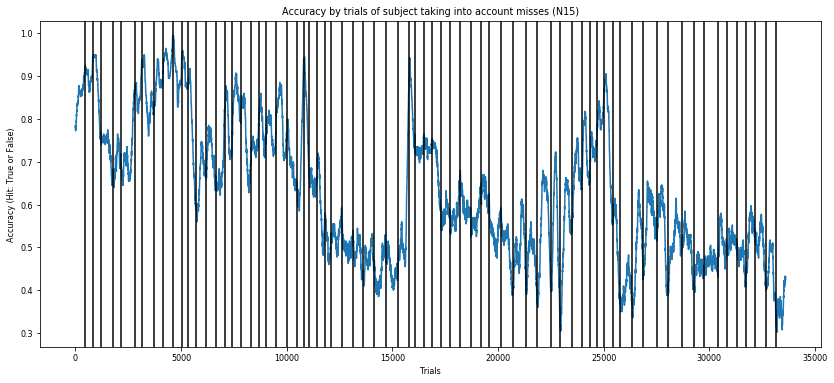

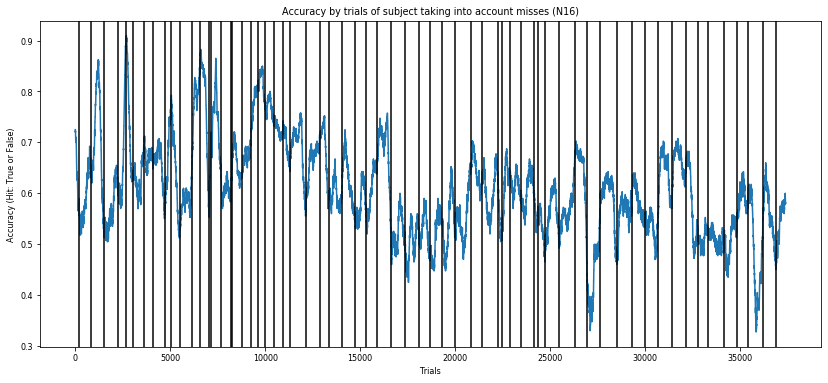

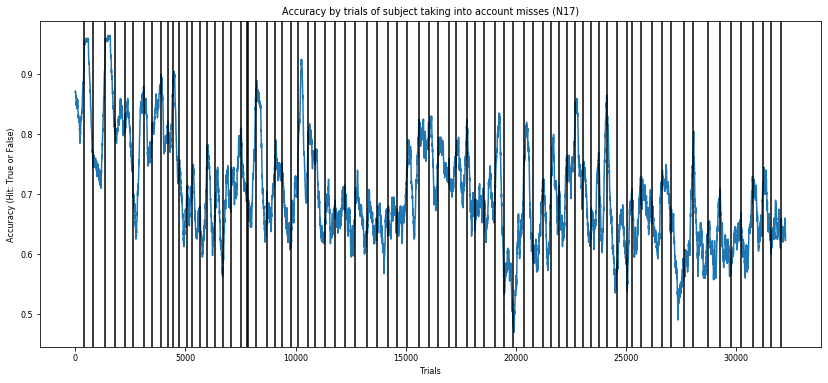

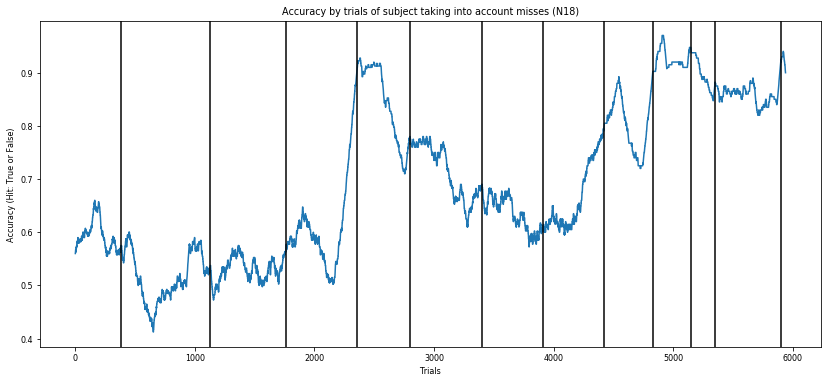

In [8]:
# TODO: colorcode by stage
# Remove misses
df_trials_without_misses = mba.remove_misses(df_trials)
# Plot it
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = mba.concatenate_trials(df_trials_without_misses, sbj)
    mba.plot_trials_subj_misses(df_trials_without_misses, sbj, df_sbj_perf, conv_w=200,
                               figsize=(14,6))

### Plot only the misses

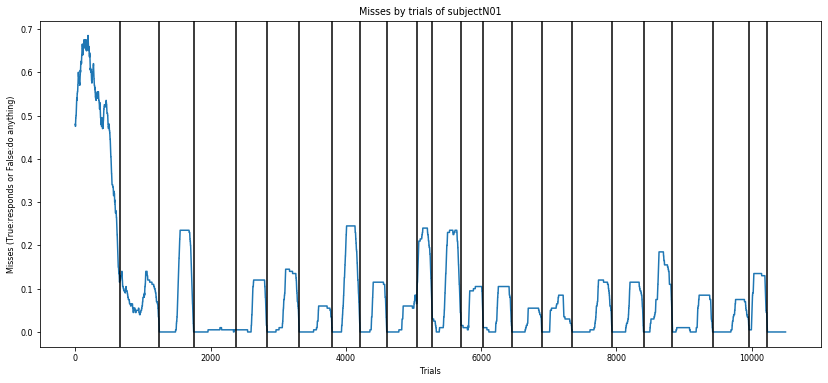

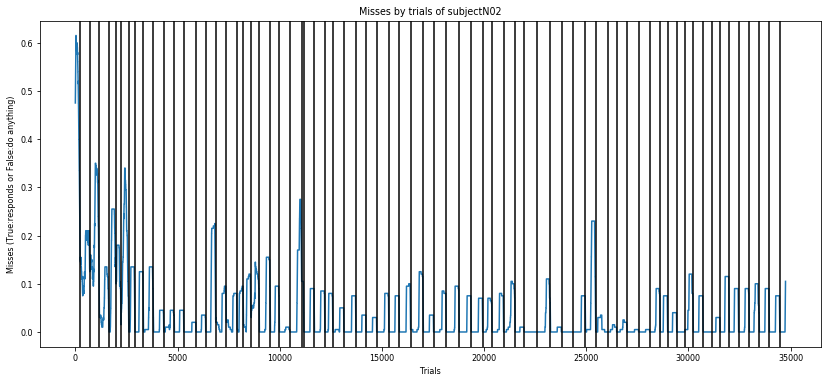

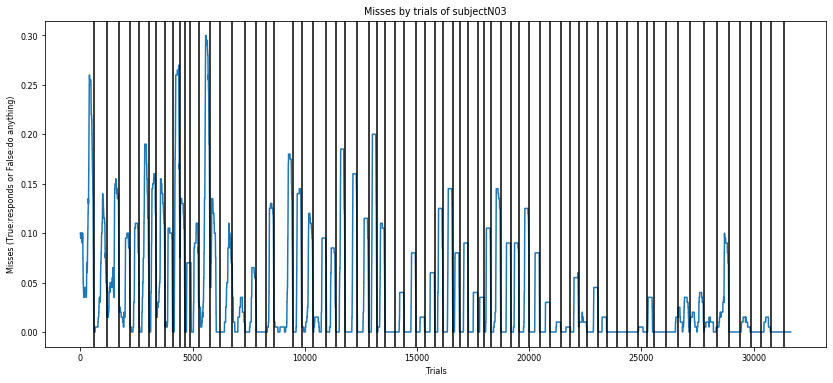

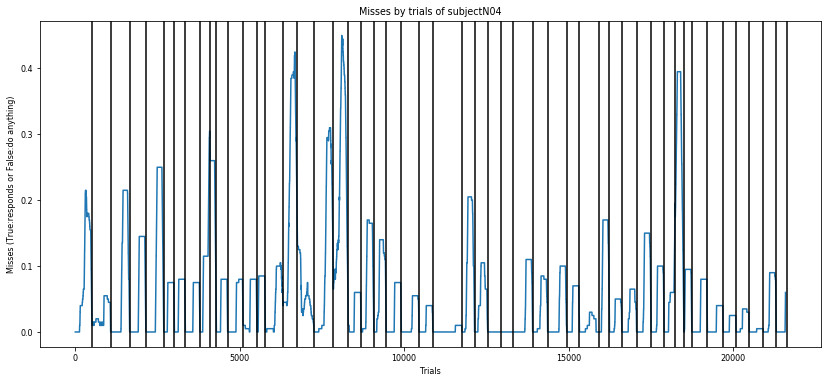

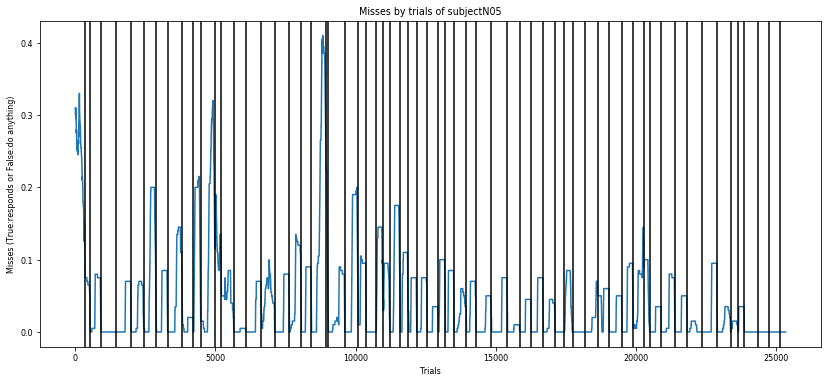

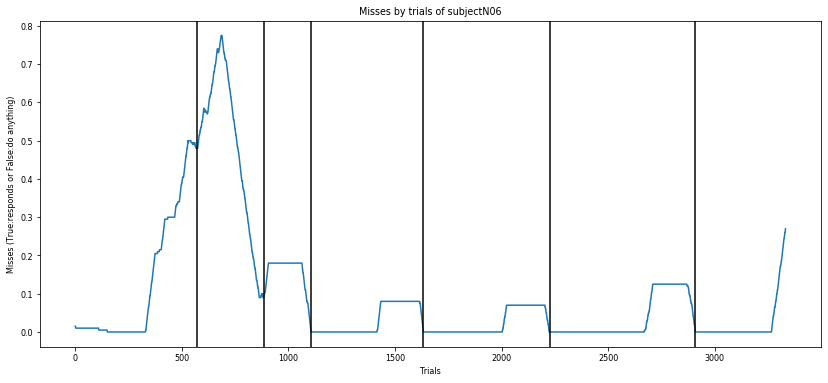

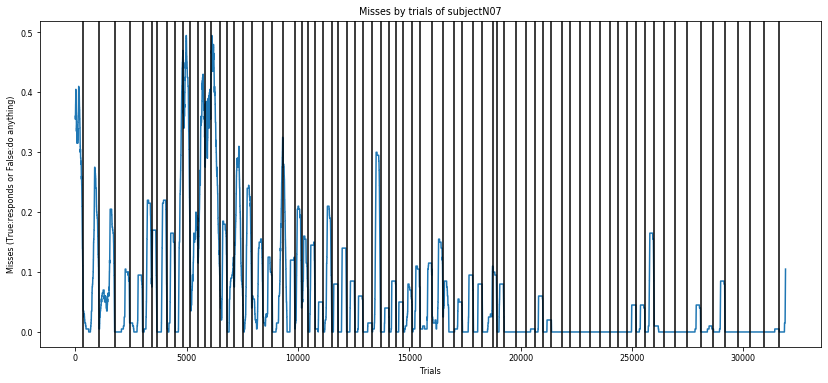

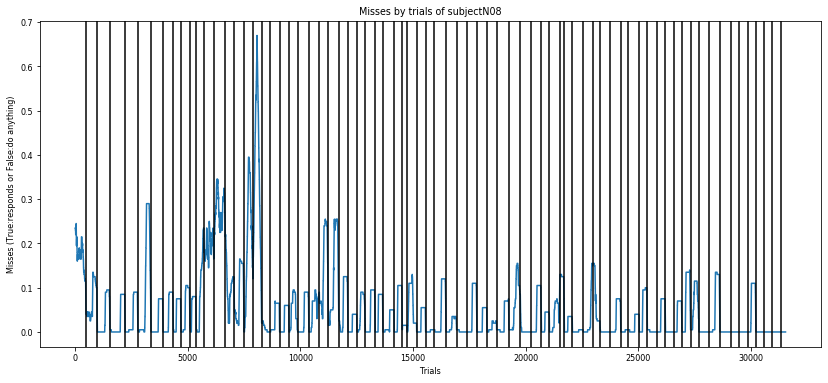

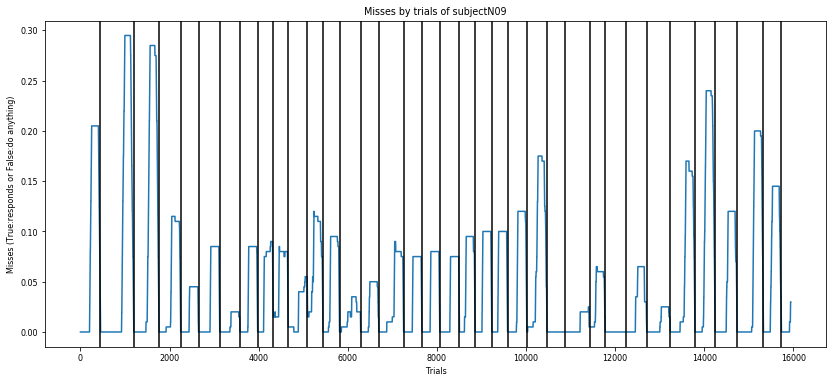

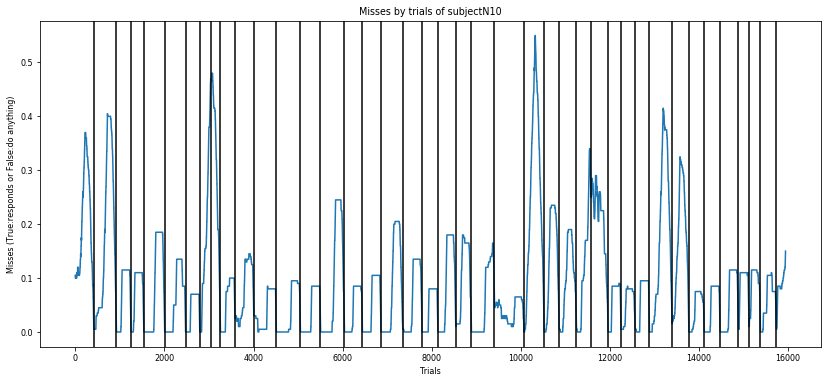

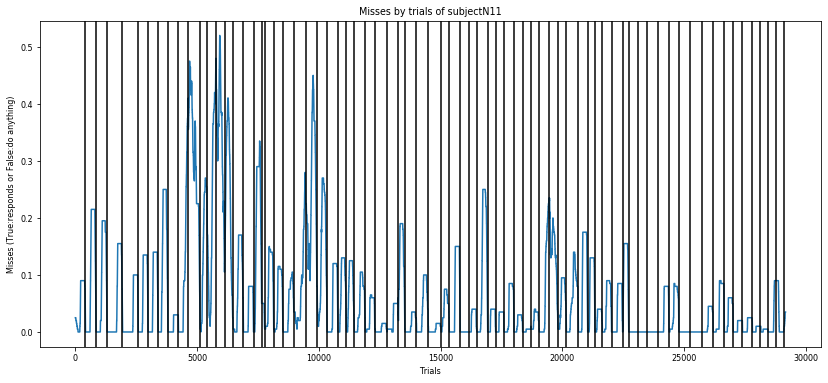

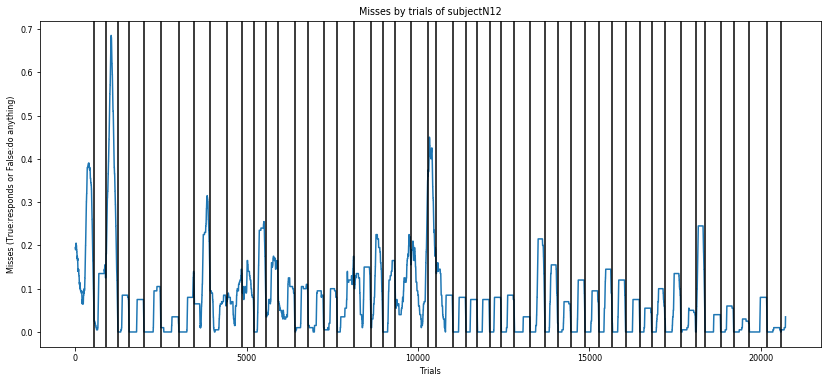

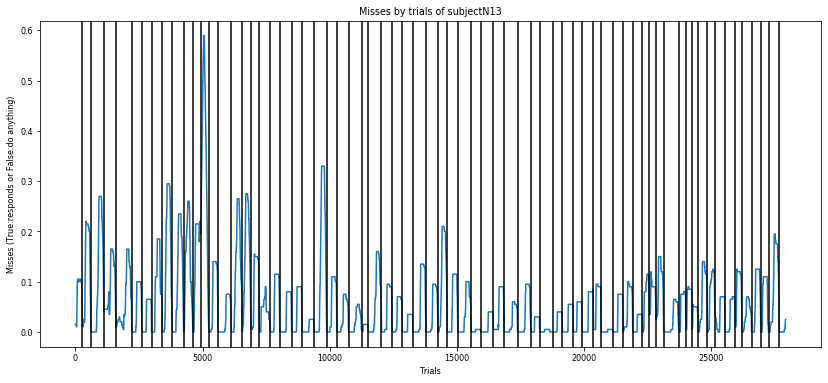

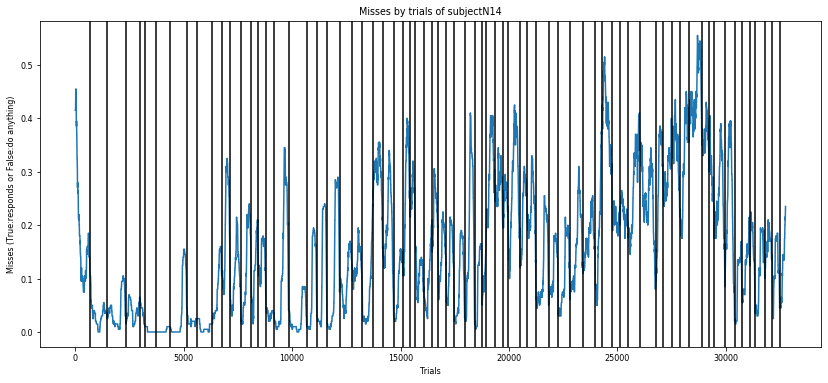

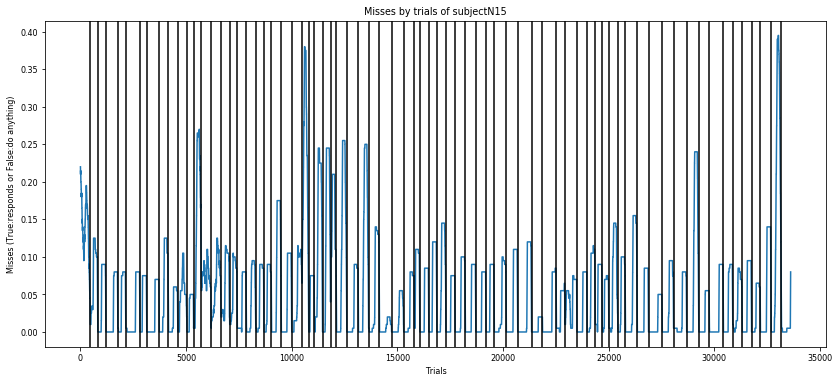

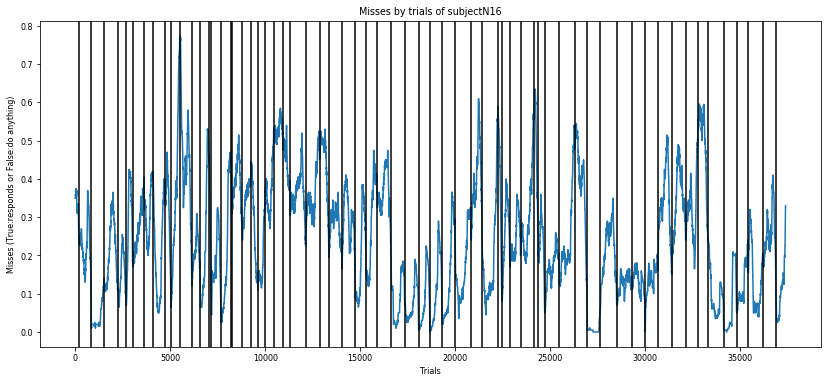

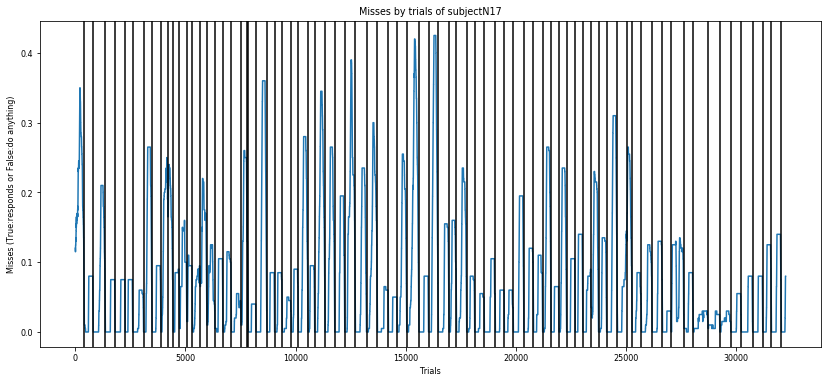

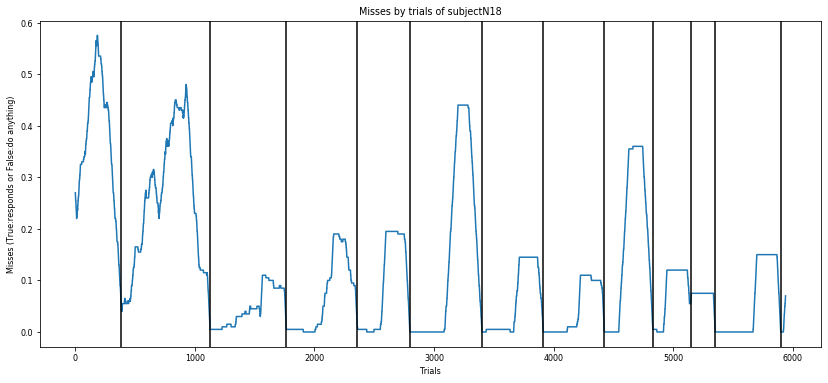

In [9]:
for i_s, sbj in enumerate(subj_unq):
    df_sbj_perf = mba.concatenate_misses(df_trials, sbj)
    mba.plot_misses_subj(df_trials, sbj, df_sbj_perf, conv_w=200, figsize=(14,6))

### Plot motor and delay variables

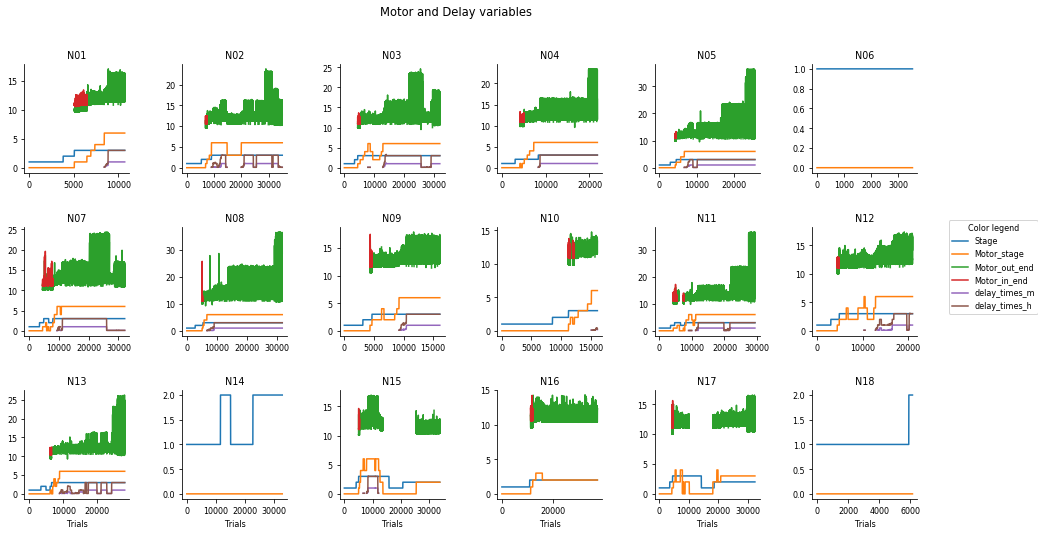

In [10]:
mba.plot_final_stage_motor_delay(subj_unq, df=df_trials, df_prms=df_params, figsize=(16, 8))